# **Week 8: Lab Exercises for COMP499/691 Conversational AI**

This lab focuses on end-to-end speech recognizer. The aim is to help you become more comfortable with implementing a speech recognition system. Throughout the lab, we will be exploring various strategies and methods to achieve this goal.

## **Task Description**

This time, our focus is on Speech recognition, also known as automatic speech recognition(ASR) to process human speech into a written format. We feed a speech signal spoken in Serbian language into the model to generate the transcription for that.

Let's first download the dataset:


In [1]:
!wget -O cv-corpus-sr.tar.gz https://www.dropbox.com/scl/fi/yfs6xh3yhmukg6itiahoy/cv-corpus-12.0-2022-12-07-sr.tar.gz?rlkey=wv9syqbh8fsv6db5d6q6uznor&dl=0

--2024-03-25 02:38:21--  https://www.dropbox.com/scl/fi/yfs6xh3yhmukg6itiahoy/cv-corpus-12.0-2022-12-07-sr.tar.gz?rlkey=wv9syqbh8fsv6db5d6q6uznor
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc12e539ddde005676ebbeda97e5.dl.dropboxusercontent.com/cd/0/inline/CPuBR3GT-barjJP7pCzx4jKHnfFHAe30Oaykkzp_aOAPOXYFeioBMqzMgHrAEeS9flG-XtsHM2z3JVcsp8MNk0mEafd_uo8-QgV6kwstDY1CWHq9qVm_vM7Pz9on0b7jqptM8ZwrqcagEepnWh2N-rP0/file# [following]
--2024-03-25 02:38:22--  https://uc12e539ddde005676ebbeda97e5.dl.dropboxusercontent.com/cd/0/inline/CPuBR3GT-barjJP7pCzx4jKHnfFHAe30Oaykkzp_aOAPOXYFeioBMqzMgHrAEeS9flG-XtsHM2z3JVcsp8MNk0mEafd_uo8-QgV6kwstDY1CWHq9qVm_vM7Pz9on0b7jqptM8ZwrqcagEepnWh2N-rP0/file
Resolving uc12e539ddde005676ebbeda97e5.dl.dropboxusercontent.com (uc12e539ddde005676ebbeda97e5.dl.dropboxusercontent.com

We can now uncompress it:

In [2]:
%%capture
!tar -zxf cv-corpus-sr.tar.gz

We also have to install the needed libraries:

In [3]:
%%capture
!git clone https://github.com/speechbrain/speechbrain.git
%cd speechbrain
!pip install -r requirements.txt
!pip install .
%cd ..

## **Exercise 1: Data Preparation**

If you inspect the data stored in `/content/cv-corpus-12.0-2022-12-07/sr` you will see that there exist three tsv files ( train, valid, and dev). These tsv files contain the following information:

-   client_id,	path, sentence,	up_votes,	down_votes,	age,	gender,	accents,	locale,	segment.

There is a clips folder that contains all audio files.

For the ASR task, you need to go over each tsv file and extract the necessary information. Specifically, you need to get the path to the audio, the transcription(sentence) and the unique_id (you could use the name of the audio file as the unique identifier).


As you can see, we have a hierarchical structure in which the first key is a **unique identifier** of the spoken sentence. You could use  the name of the audio file as the unique identifier.
Then, we specify all the fields that are needed for the task addressed. For instance, we report the **path of the speech recording**, its **duration** in seconds (needed if we wanna sort the sentences before creating the mini-batches), and the **sequence of words** uttered in the given recording.

Also, since the ASR task could be computationally heavy, we only use a sub-sample of the data. Therefore, you need to get only 1 , 1/9 and 1/6 hours of data for training, validation, and test respectively. You could sample that using the sum of the calculated duration for each audio.

**Write the code for preparing the JSON data-manifest files**.You have to create 3 JSON files:
- 'train.json'
- 'valid.json'
- 'test.json'

They should be formatted in the following way:


**train.json**
```
{
  "common_voice_sr_26981130": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_26981130.mp3",
    "duration": 3.168,
    "words": "То све доказује."
  },
  "common_voice_sr_26981131": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/common_voice_sr_26981131.mp3",
    "duration": 2.988,
    "words": "А не може."
  },
  "common_voice_sr_26981132": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_26981132.mp3",
    "duration": 2.736,
    "words": "Он је пријатељ."
  },
....

```

**valid.json**
```
{
  "common_voice_sr_35090117": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_35090117.mp3",
    "duration": 2.988,
    "words": "Па не знам."
  },
  "common_voice_sr_35090119": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_35090119.mp3",
    "duration": 2.556,
    "words": "Како да нисам."
  },
  "common_voice_sr_35090120": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_35090120.mp3",
    "duration": 2.376,
    "words": "За пет минута."
  },
....
```

**test.json**

```
{
  "common_voice_sr_35087568": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_35087568.mp3",
    "duration": 3.276,
    "words": "Ја сам сам!"
  },
  "common_voice_sr_27607049": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_27607049.mp3",
    "duration": 3.636,
    "words": "Реци и мени!"
  },
  "common_voice_sr_27607050": {
    "path": "/content/cv-corpus-12.0-2022-12-07/sr/clips/common_voice_sr_27607050.mp3",
    "duration": 3.42,
    "words": "Хајде, хајде тамо."
  },
....
```

**Suggestions:**
- You can get the number of samples of each wave with torchaudio.info. You have to compute the duration in seconds by diving it for the sampling frequency.
- Since training could be time-consuming, you could start with a tiny amount of data for debugging. And when you are sure about your implementation, you could run it on the original dataset to get the final result.


In [5]:
import json
import torchaudio
from tqdm.contrib import tzip
import re
import pandas as pd

def create_json(tsv_file,data_folder,json_file,max_duration):
  # Your code here
  df = pd.read_csv(tsv_file, sep='\t')
  total_duration = 0
  data_manifest = {}

  for _, row in df.iterrows():
      if total_duration >= max_duration:
          break

      audio_path = f"{data_folder}/clips/{row['path']}"
      unique_id = row['path'].split('.')[0]

      waveform, sample_rate = torchaudio.load(audio_path)
      duration = waveform.shape[1] / sample_rate

      total_duration += duration

      data_manifest[unique_id] = {
          "path": audio_path,
          "duration": duration,
          "words": row['sentence']
      }

  with open(json_file, 'w') as f:
      json.dump(data_manifest, f, ensure_ascii=False, indent=2)

data_folder='/content/cv-corpus-12.0-2022-12-07/sr'
max_durations=[3600,400,600]

create_json(data_folder+'/train.tsv',data_folder,f'{data_folder}/train.json',max_durations[0])
create_json(data_folder+'/dev.tsv',data_folder,f'{data_folder}/valid.json',max_durations[1])
create_json(data_folder+'/test.tsv',data_folder,f'{data_folder}/test.json',max_durations[2])

## **Exercise 2: Speech recognition with Wav2vec + CTC Loss**

You have to implement the following model:

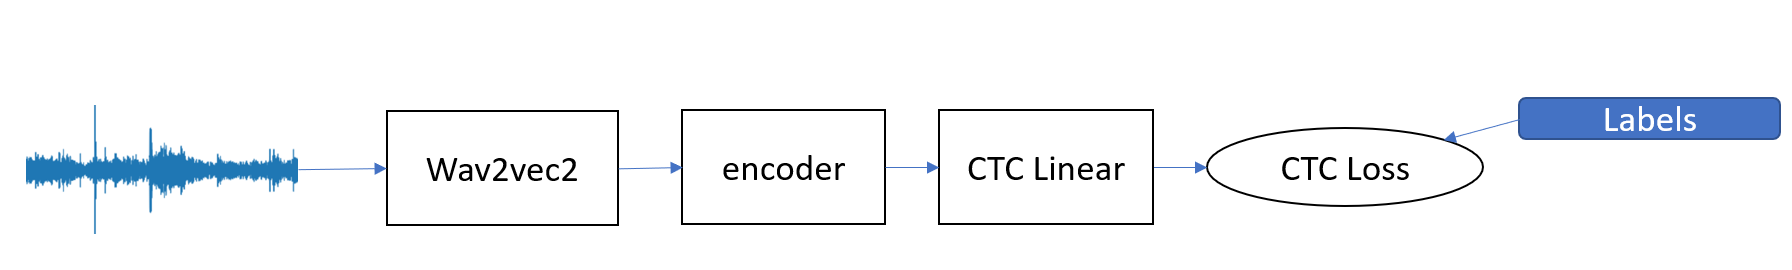

For wav2vec2, you should use  https://huggingface.co/facebook/wav2vec2-large-xlsr-53 for the pretrained model and finetune it. In order to be able to use this model, you need to have a huggingface access token and log-in using this token with the following code:



```
from huggingface_hub import notebook_login
notebook_login()
```



For the encoder,

- linear1 : (wav2vec_output_dim, 1024)
- BatchNorm1d
- LeakyReLU
- Dropout : 0.15
- linear2:  ( 1024, 1024)
- BatchNorm1d
- LeakyReLU
- Dropout : 0.15
- linear3 :( 1024, 1024)
- BatchNorm1d
- LeakyReLU

For CTC Linear, you could use a linear layer which converts the previous layer output to output_neurons.

For CTC Loss, you should use ctc_loss from speechbrain.

**Important**: Use ``warmup_steps: 25`` and ``output_neurons: 500``

You can draw inspiration from existing speechbrain recipes. For instance take a look at the Commonvoice recipes available [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/CommonVoice/ASR/CTC). See in particular, `train_with_wav2vec.py` and `hparams/train_*_with_wav2vec.yaml`.



**Write the code for the hyperparameters**:


You need to fill specified parts in the hparams file.

In [51]:
%%file hparams_sr_wav2vec.yaml

seed: 1234
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref results/wav2vec2_sr/<seed>
test_wer_file: !ref <output_folder>/wer_test.txt
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Wave2Vec2
wav2vec2_hub: "facebook/wav2vec2-large-xlsr-53"
wav2vec2_folder: !ref <save_folder>/wav2vec2_checkpoint

# Data files
data_folder: /content/cv-corpus-12.0-2022-12-07/sr
train_tsv_file: !ref <data_folder>/train.tsv
dev_tsv_file: !ref <data_folder>/dev.tsv
test_tsv_file: !ref <data_folder>/test.tsv
accented_letters: True
# language: sr ???

train_annotation: !ref <data_folder>/train.json
test_annotation: !ref <data_folder>/test.json
valid_annotation: !ref <data_folder>/valid.json
skip_prep: False


test_beam_search:
  blank_index: !ref <blank_index>
  beam_size: 100
  beam_prune_logp: -12.0
  token_prune_min_logp: -1.2
  prune_history: True
  topk: 1
  alpha: 1.0
  beta: 0.5



####################### Training Parameters ####################################

number_of_epochs: 30
lr: 1.0
lr_wav2vec: 0.0001
sorting: "ascending"
sample_rate: 16000
ckpt_interval_minutes: 30

batch_size: 4
test_batch_size: 4

dataloader_options:
    batch_size: !ref <batch_size>
    num_workers: 6
test_dataloader_options:
    batch_size: !ref <test_batch_size>
    num_workers: 6

token_type: unigram  # ["unigram", "bpe", "char"]
character_coverage: 1.0


# Model Parameters
wav2vec_output_dim: 1024
dnn_neurons: 1024
freeze_wav2vec: False
freeze_feature_extractor: False
dropout: 0.15
warmup_steps: 25

output_neurons: 500

blank_index: 0
bos_index: 1
eos_index: 2

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>


# Speed perturbation
speed_perturb: !new:speechbrain.augment.time_domain.SpeedPerturb
    orig_freq: !ref <sample_rate>
    speeds: [95, 100, 105]

# Frequency drop: randomly drops a number of frequency bands to zero.
drop_freq: !new:speechbrain.augment.time_domain.DropFreq
    drop_freq_low: 0
    drop_freq_high: 1
    drop_freq_count_low: 1
    drop_freq_count_high: 3
    drop_freq_width: 0.05

# Time drop: randomly drops a number of temporal chunks.
drop_chunk: !new:speechbrain.augment.time_domain.DropChunk
    drop_length_low: 1000
    drop_length_high: 2000
    drop_count_low: 1
    drop_count_high: 5

# Augmenter: Combines previously defined augmentations to perform data augmentation
wav_augment: !new:speechbrain.augment.augmenter.Augmenter
    min_augmentations: 3
    max_augmentations: 3
    augment_prob: 1.0
    augmentations: [
        !ref <speed_perturb>,
        !ref <drop_freq>,
        !ref <drop_chunk>]

####################### Models ##########################################

enc: !new:speechbrain.nnet.containers.Sequential
    input_shape: [null, null, !ref <wav2vec_output_dim>]
    linear1: !name:speechbrain.nnet.linear.Linear
        n_neurons: !ref <dnn_neurons>
        bias: True
    bn1: !name:speechbrain.nnet.normalization.BatchNorm1d
    activation: !new:torch.nn.LeakyReLU
    drop: !new:torch.nn.Dropout
        p: !ref <dropout>
    linear2: !name:speechbrain.nnet.linear.Linear
        n_neurons: !ref <dnn_neurons>
        bias: True
    bn2: !name:speechbrain.nnet.normalization.BatchNorm1d
    activation2: !new:torch.nn.LeakyReLU
    drop2: !new:torch.nn.Dropout
        p: !ref <dropout>
    linear3: !name:speechbrain.nnet.linear.Linear
        n_neurons: !ref <dnn_neurons>
        bias: True
    bn3: !name:speechbrain.nnet.normalization.BatchNorm1d
    activation3: !new:torch.nn.LeakyReLU

wav2vec2: !new:speechbrain.lobes.models.huggingface_transformers.wav2vec2.Wav2Vec2
    source: !ref <wav2vec2_hub>
    output_norm: True
    freeze: !ref <freeze_wav2vec>
    freeze_feature_extractor: !ref <freeze_feature_extractor>
    save_path: !ref <wav2vec2_folder>

ctc_lin: !new:speechbrain.nnet.linear.Linear
    input_size: !ref <dnn_neurons>
    n_neurons: !ref <output_neurons>

ctc_cost: !name:speechbrain.nnet.losses.ctc_loss
  blank_index: !ref <blank_index>

log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

modules:
    wav2vec2: !ref <wav2vec2>
    enc: !ref <enc>
    ctc_lin: !ref <ctc_lin>

model: !new:torch.nn.ModuleList
    - [!ref <enc>, !ref <ctc_lin>]


model_opt_class: !name:torch.optim.Adadelta
    lr: !ref <lr>
    rho: 0.95
    eps: 1.e-8

wav2vec_opt_class: !name:torch.optim.Adam
    lr: !ref <lr_wav2vec>


lr_annealing_model: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.8
    patient: 0

lr_annealing_wav2vec: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr_wav2vec>
    improvement_threshold: 0.0025
    annealing_factor: 0.9
    patient: 0

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        wav2vec2: !ref <wav2vec2>
        model: !ref <model>
        scheduler_model: !ref <lr_annealing_model>
        scheduler_wav2vec: !ref <lr_annealing_wav2vec>
        counter: !ref <epoch_counter>

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_rate_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats

cer_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats
    split_tokens: True

Overwriting hparams_sr_wav2vec.yaml


**Write the code for the training script**:

 You need to complete compute_forward, compute_objectives and dataio_prepare functions.



In [52]:
%%file train_with_wav2vec.py

# Your code here
import sys
import torch
import logging
import speechbrain as sb
import torchaudio
from hyperpyyaml import load_hyperpyyaml
from speechbrain.tokenizers.SentencePiece import SentencePiece
from speechbrain.utils.data_utils import undo_padding
from speechbrain.utils.distributed import run_on_main, if_main_process

logger = logging.getLogger(__name__)

class SpeechRecBrain(sb.Brain):

  def compute_forward(self, batch, stage):
    batch = batch.to(self.device)
    wavs, wav_lens = batch.sig
    tokens_bos, _ = batch.tokens_bos
    wavs, wav_lens = wavs.to(self.device), wav_lens.to(self.device)

    # Add waveform augmentation if specified.
    if stage == sb.Stage.TRAIN and hasattr(self.hparams, "wav_augment"):
        wavs, wav_lens = self.hparams.wav_augment(wavs, wav_lens)

    # Forward pass
    feats = self.modules.wav2vec2(wavs, wav_lens)
    x = self.modules.enc(feats)
    logits = self.modules.ctc_lin(x)
    p_ctc = self.hparams.log_softmax(logits)

    p_tokens = None
    if stage == sb.Stage.VALID:
        p_tokens = sb.decoders.ctc_greedy_decode(
            p_ctc, wav_lens, blank_id=self.hparams.blank_index
        )
    elif stage == sb.Stage.TEST:
        p_tokens = test_searcher(p_ctc, wav_lens)

    return p_ctc, wav_lens, p_tokens

  def compute_objectives(self, predictions, batch, stage):
    p_ctc, wav_lens, p_tokens = predictions

    ids = batch.id
    tokens_eos, tokens_eos_lens = batch.tokens_eos
    tokens, tokens_lens = batch.tokens

    if stage == sb.Stage.TRAIN and hasattr(self.hparams, "wav_augment"):
        tokens = self.hparams.wav_augment.replicate_labels(tokens)
        tokens_lens = self.hparams.wav_augment.replicate_labels(tokens_lens)

    loss = self.hparams.ctc_cost(p_ctc, tokens, wav_lens, tokens_lens)

    if stage == sb.Stage.VALID:
        # Convert token indices to words
        predicted_words = self.tokenizer(p_tokens, task="decode_from_list")

    elif stage == sb.Stage.TEST:
        predicted_words = [hyp[0].text.split(" ") for hyp in p_tokens]

    if stage != sb.Stage.TRAIN:
        # Convert indices to words
        target_words = undo_padding(tokens, tokens_lens)
        target_words = self.tokenizer(target_words, task="decode_from_list")

        self.wer_metric.append(ids, predicted_words, target_words)
        self.cer_metric.append(ids, predicted_words, target_words)

    return loss

  def on_stage_start(self, stage, epoch=None):
     if stage != sb.Stage.TRAIN:
        self.cer_metric = self.hparams.cer_computer()
        self.wer_metric = self.hparams.error_rate_computer()

  def on_stage_end(self, stage, stage_loss, epoch=None):
    stage_stats = {"loss": stage_loss}
    if stage == sb.Stage.TRAIN:
        self.train_stats = stage_stats
    else:
        stage_stats["CER"] = self.cer_metric.summarize("error_rate")
        stage_stats["WER"] = self.wer_metric.summarize("error_rate")

    # Perform end-of-iteration things, like annealing, logging, etc.
    if stage == sb.Stage.VALID:
        old_lr_model, new_lr_model = self.hparams.lr_annealing_model(
            stage_stats["loss"]
        )
        old_lr_wav2vec, new_lr_wav2vec = self.hparams.lr_annealing_wav2vec(
            stage_stats["loss"]
        )
        sb.nnet.schedulers.update_learning_rate(
            self.model_optimizer, new_lr_model
        )
        if not self.hparams.wav2vec2.freeze:
            sb.nnet.schedulers.update_learning_rate(
                self.wav2vec_optimizer, new_lr_wav2vec
            )
        self.hparams.train_logger.log_stats(
            stats_meta={
                "epoch": epoch,
                "lr_model": old_lr_model,
                "lr_wav2vec": old_lr_wav2vec,
            },
            train_stats=self.train_stats,
            valid_stats=stage_stats,
        )
        self.checkpointer.save_and_keep_only(
            meta={"WER": stage_stats["WER"]}, min_keys=["WER"],
        )
    elif stage == sb.Stage.TEST:
        self.hparams.train_logger.log_stats(
            stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
            test_stats=stage_stats,
        )
        if if_main_process():
            with open(self.hparams.test_wer_file, "w") as w:
                self.wer_metric.write_stats(w)

  def init_optimizers(self):
    "Initializes the wav2vec2 optimizer and model optimizer"

    # If the wav2vec encoder is unfrozen, we create the optimizer
    if not self.hparams.wav2vec2.freeze:
        self.wav2vec_optimizer = self.hparams.wav2vec_opt_class(
            self.modules.wav2vec2.parameters()
        )
        if self.checkpointer is not None:
            self.checkpointer.add_recoverable(
                "wav2vec_opt", self.wav2vec_optimizer
            )

    self.model_optimizer = self.hparams.model_opt_class(
        self.hparams.model.parameters()
    )

    if self.checkpointer is not None:
        self.checkpointer.add_recoverable("modelopt", self.model_optimizer)

    if not self.hparams.wav2vec2.freeze:
        self.optimizers_dict = {
            "wav2vec_optimizer": self.wav2vec_optimizer,
            "model_optimizer": self.model_optimizer,
        }
    else:
        self.optimizers_dict = {"model_optimizer": self.model_optimizer}

  def freeze_optimizers(self, optimizers):
    """Freezes the wav2vec2 optimizer according to the warmup steps"""
    valid_optimizers = {}
    if not self.hparams.wav2vec2.freeze:
        if self.optimizer_step >= self.hparams.warmup_steps:
            valid_optimizers["wav2vec_optimizer"] = optimizers[
                "wav2vec_optimizer"
            ]
    valid_optimizers["model_optimizer"] = optimizers["model_optimizer"]

    return valid_optimizers

def dataio_prep(hparams, tokenizer):

  # audio pipleline
  @sb.utils.data_pipeline.takes("path")
  @sb.utils.data_pipeline.provides("sig")
  def audio_pipeline(path):
    """Load the audio signal. This is done on the CPU in the `collate_fn`."""
    info = torchaudio.info(path)
    sig = sb.dataio.dataio.read_audio(path)
    resampled = torchaudio.transforms.Resample(
        info.sample_rate, hparams["sample_rate"],
    )(sig)

    return resampled

  # test processing pipeline
  @sb.utils.data_pipeline.takes("words")
  @sb.utils.data_pipeline.provides(
      "words", "tokens_list", "tokens_bos", "tokens_eos", "tokens"
  )
  def text_pipeline(words):
    """Processes the transcriptions to generate proper labels"""
    yield words
    tokens_list = tokenizer.sp.encode_as_ids(words)
    yield tokens_list
    tokens_bos = torch.LongTensor([hparams["bos_index"]] + (tokens_list))
    yield tokens_bos
    tokens_eos = torch.LongTensor(tokens_list + [hparams["eos_index"]])
    yield tokens_eos
    tokens = torch.LongTensor(tokens_list)
    yield tokens

  data_folder = hparams["data_folder"]

  # Load the train dataset
  train_data = sb.dataio.dataset.DynamicItemDataset.from_json(
      json_path=hparams["train_annotation"],
      replacements={"data_root": data_folder},
      dynamic_items=[audio_pipeline, text_pipeline],
      output_keys=["id", "sig", "words", "tokens_bos", "tokens_eos", "tokens"],
  )
  if hparams["sorting"] == "ascending":
      train_data = train_data.filtered_sorted(sort_key="duration")
      hparams["dataloader_options"]["shuffle"] = False
  elif hparams["sorting"] == "descending":
      train_data = train_data.filtered_sorted(sort_key="duration", reverse=True)
      hparams["dataloader_options"]["shuffle"] = False
  elif hparams["sorting"] == "random":
      hparams["dataloader_options"]["shuffle"] = True
  else:
      raise NotImplementedError("Sorting must be 'random', 'ascending' or 'descending'.")

  # Load the validation dataset
  valid_data = sb.dataio.dataset.DynamicItemDataset.from_json(
      json_path=hparams["valid_annotation"],
      replacements={"data_root": data_folder},
      dynamic_items=[audio_pipeline, text_pipeline],
      output_keys=["id", "sig", "words", "tokens_bos", "tokens_eos", "tokens"],
  )
  valid_data = valid_data.filtered_sorted(sort_key="duration")
  hparams["test_dataloader_options"]["shuffle"] = False

  # Load the test dataset
  test_data = sb.dataio.dataset.DynamicItemDataset.from_json(
      json_path=hparams["test_annotation"],
      replacements={"data_root": data_folder},
      dynamic_items=[audio_pipeline, text_pipeline],
      output_keys=["id", "sig", "words", "tokens_bos", "tokens_eos", "tokens"],
  )
  test_data = test_data.filtered_sorted(sort_key="duration")
  hparams["test_dataloader_options"]["shuffle"] = False

  # datasets = {}
  # data_info = {
  #     "train": hparams["train_annotation"],
  #     "valid": hparams["valid_annotation"],
  #     "test": hparams["test_annotation"],
  # }
  # data_folder = hparams["data_folder"]

  # for dataset_name, dataset_path in data_info.items():
  #   if hparams["sorting"] == "ascending":
  #     datasets[dataset_name] = datasets[dataset_name].filtered_sorted(sort_key="duration")
  #     hparams[f"{dataset_name}_dataloader_opts"]["shuffle"] = False

  #   elif hparams["sorting"] == "descending":
  #     datasets[dataset_name] = datasets[dataset_name].filtered_sorted(sort_key="duration", reverse=True)
  #     hparams[f"{dataset_name}_dataloader_opts"]["shuffle"] = False

  #   # Assuming that 'random' sorting means shuffling the dataset
  #   elif hparams["sorting"] == "random":
  #     hparams[f"{dataset_name}_dataloader_opts"]["shuffle"] = True

  #   else:
  #     raise NotImplementedError("Sorting must be 'random', 'ascending' or 'descending'.")

  #   datasets[dataset_name] = sb.dataio.dataset.DynamicItemDataset.from_json(
  #       json_path=dataset_path,
  #       replacements={"data_root": data_folder},
  #       dynamic_items=[audio_pipeline, text_pipeline],
  #       output_keys=[
  #           "id",
  #           "sig",
  #           "words",
  #           "tokens_bos",
  #           "tokens_eos",
  #           "tokens",
  #       ],
  #   )
  return train_data, valid_data, test_data


if __name__ == "__main__":

  hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

  with open(hparams_file) as fin:
    hparams = load_hyperpyyaml(fin, overrides)

  # Create experiment directory
  sb.create_experiment_directory(
    experiment_directory=hparams["output_folder"],
    hyperparams_to_save=hparams_file,
    overrides=overrides,
  )

  tokenizer = SentencePiece(
      model_dir=hparams["save_folder"],
      vocab_size=hparams["output_neurons"],
      annotation_train=hparams["train_annotation"],
      annotation_read="words",
      annotation_format="json",
      model_type=hparams["token_type"],
      character_coverage=hparams["character_coverage"],
      )


  train_data, valid_data, test_data = dataio_prep(hparams, tokenizer)

  asr_brain = SpeechRecBrain(
    modules=hparams["modules"],
    hparams=hparams,
    run_opts=run_opts,
    checkpointer=hparams["checkpointer"],
  )

  asr_brain.tokenizer = tokenizer
  vocab_list = [
      tokenizer.sp.id_to_piece(i) for i in range(tokenizer.sp.vocab_size())
  ]

  from speechbrain.decoders.ctc import CTCBeamSearcher

  test_searcher = CTCBeamSearcher(
      **hparams["test_beam_search"], vocab_list=vocab_list,
  )

  # Training
  asr_brain.fit(
    epoch_counter=asr_brain.hparams.epoch_counter,
    train_set=train_data,
    valid_set=valid_data,
    train_loader_kwargs=hparams["dataloader_options"],
    valid_loader_kwargs=hparams["test_dataloader_options"],
  )

  asr_brain.evaluate(
    test_data,
    min_key="WER",
    test_loader_kwargs=hparams["test_dataloader_options"],
  )

Overwriting train_with_wav2vec.py


**Run the code below** to train the model

It would take around 20-30 minutes on GPU.

In [53]:
# Remember: Delete the output folder to start training from scratch

# Run Training
!python train_with_wav2vec.py hparams_sr_wav2vec.yaml  --device='cuda:0' --number_of_epochs=10 --seed=1986

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53 and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/wav2vec2_sr/1986
speechbrain.tokenizers.SentencePiece - Tokenizer is already trained.
speechbrain.tokenizers.SentencePiece - ==== Loading Tokenizer ===
speechbrain.tokenizers.SentencePiece - Tokenizer path: results/wav2vec2_sr/1986/save/500_unigram.model
speechbrain.tokenizers.SentencePiece - Tokenizer vocab_size: 500
speechbrain.tokenizers.SentencePiece - Tokenizer type: unigram
speechbrain.core - Info: ckpt_interval_minutes arg from hparam file is used
speechbrain.core - Gradscaler enabled: False. Using pre

The expected error rate in testing is around 80%. But don't lose hope! Adding more data could make the model much better. We suggest fine-tuning the model with [Whisper](https://arxiv.org/abs/2212.04356) for extra practice.
You can find examples on how to do this [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/CommonVoice/ASR/transformer).